Pontificia Universidad Católica de Chile

Escuela de Ingeniería

Departamento de Ingeniería Eléctrica

IEE3936 - Estimación y Control Óptimo en Robótica

<p align="center">
  Tarea 4: Control Óptimo
  <br>
  11 de julio 10:00 hrs
  <br>
  Diego Muñoz Rojas y rtín Pincheira Morales
</p>

In [13]:
import json
from funciones import *
from params_vehiculo import *

# PID
# cargar datos desde el archivo JSON
with open('listas_datos_pid_1setpoint.json', 'r') as file:
    datos = json.load(file)

# cargar datos
lista_tiempo_pid = np.array(datos['Lista1'])
lista_senal_control_pid = np.array(datos['Lista2'])
lista_ref_x_pid = np.array(datos['Lista3'])
lista_ref_y_pid = np.array(datos['Lista4'])
lista_ref_a_pid = np.array(datos['Lista5'])
lista_err_x_pid = np.array(datos['Lista6'])
lista_err_y_pid = np.array(datos['Lista7'])
lista_err_a_pid = np.array(datos['Lista8'])
lista_estado_x_pid = np.array(datos['Lista9'])
lista_estado_y_pid = np.array(datos['Lista10'])
lista_estado_a_pid = np.array(datos['Lista11'])
lista_estado_v_pid = np.array(datos['Lista12'])
lista_estado_w_pid = np.array(datos['Lista13'])
lista_estado_pid = np.array([lista_estado_x_pid, lista_estado_y_pid, lista_estado_a_pid, lista_estado_v_pid, lista_estado_w_pid])
# metrica de desempeño
calcular_ITAE_x_pid = calcular_ITAE(lista_err_x_pid)
calcular_ITAE_y_pid = calcular_ITAE(lista_err_y_pid)
calcular_ITAE_a_pid = calcular_ITAE(lista_err_a_pid)

# LQI
# cargar datos desde el archivo JSON
with open('listas_datos_lqi_1setpoint.json', 'r') as file:
    datos = json.load(file)

# cargar datos
lista_tiempo_lqi = np.array(datos['Lista1'])
lista_senal_control_lqi = np.array(datos['Lista2'])
lista_ref_x_lqi = np.array(datos['Lista3'])
lista_ref_y_lqi = np.array(datos['Lista4'])
lista_ref_a_lqi = np.array(datos['Lista5'])
lista_err_x_lqi = np.array(datos['Lista6'])
lista_err_y_lqi = np.array(datos['Lista7'])
lista_err_a_lqi = np.array(datos['Lista8'])
lista_estado_x_lqi = np.array(datos['Lista9'])
lista_estado_y_lqi = np.array(datos['Lista10'])
lista_estado_a_lqi = np.array(datos['Lista11'])
lista_estado_v_lqi = np.array(datos['Lista12'])
lista_estado_w_lqi = np.array(datos['Lista13'])
lista_estado_int_err_x_lqi = np.array(datos['Lista14'])
lista_estado_int_err_y_lqi = np.array(datos['Lista15'])
lista_estado_int_err_a_lqi = np.array(datos['Lista16'])
lista_estado_lqi = np.array([lista_estado_x_lqi, lista_estado_y_lqi, lista_estado_a_lqi, lista_estado_v_lqi, lista_estado_w_lqi, lista_estado_int_err_x_lqi, lista_estado_int_err_y_lqi, lista_estado_int_err_a_lqi])
# metrica de desempeño
calcular_ITAE_x_lqi = calcular_ITAE(lista_err_x_lqi)
calcular_ITAE_y_lqi = calcular_ITAE(lista_err_y_lqi)
calcular_ITAE_a_lqi = calcular_ITAE(lista_err_a_lqi)
# funcion objetivo
# fo pid
valores_fo_pid = []
for i in range(len(lista_estado_x_pid)):
    lista_j_pid = funcion_objetivo(lista_estado_pid[:,i], lista_senal_control_pid[:][i], Q_pid, R_pid)
    valores_fo_pid.append(lista_j_pid)
lista_jtime_pid = funcion_objetivo_tiempo(valores_fo_pid)
# fo lqi
valores_fo_lqi = []
for i in range(len(lista_estado_x_lqi)):
    lista_j_lqi = funcion_objetivo(lista_estado_lqi[:,i], lista_senal_control_lqi[:][i], Q_lqr, R_lqr)
    valores_fo_lqi.append(lista_j_lqi)
lista_jtime_lqi = funcion_objetivo_tiempo(valores_fo_lqi)

enegergia_acum_d_pid = np.array(energia_acumulada(lista_senal_control_pid[:,0]))
enegergia_acum_i_pid = np.array(energia_acumulada(lista_senal_control_pid[:,1]))
enegergia_acum_d_lqi = np.array(energia_acumulada(lista_senal_control_lqi[:,0]))
enegergia_acum_i_lqi = np.array(energia_acumulada(lista_senal_control_lqi[:,1]))

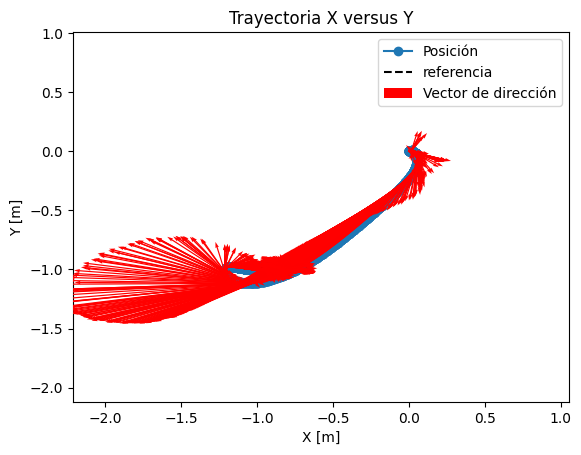

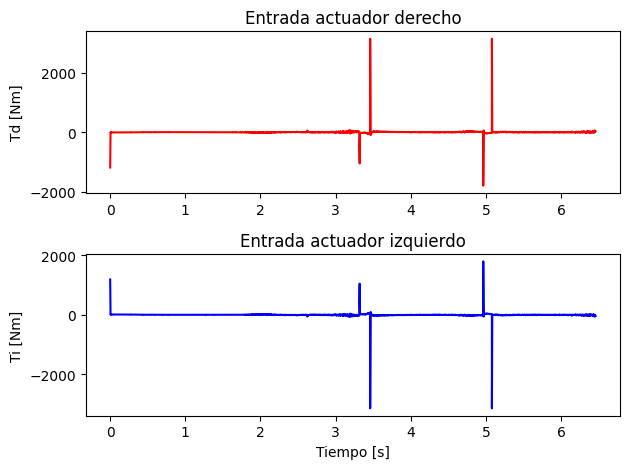

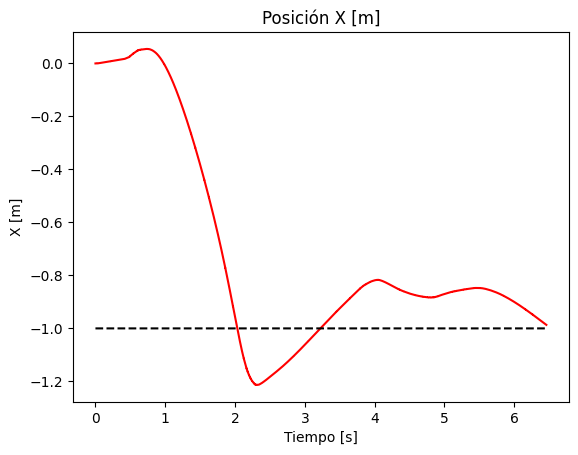

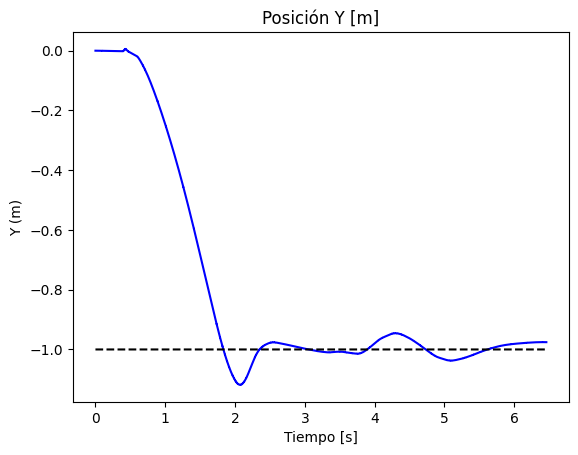

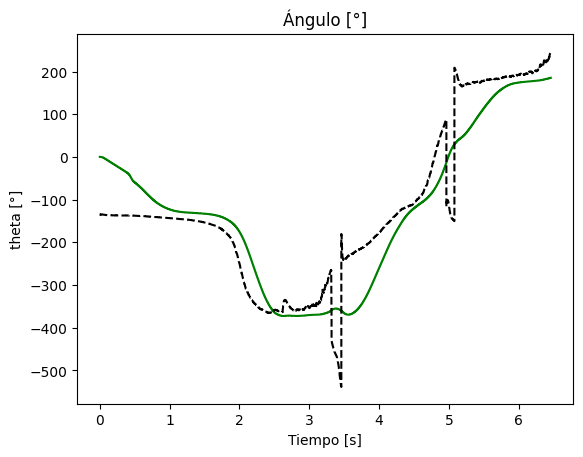

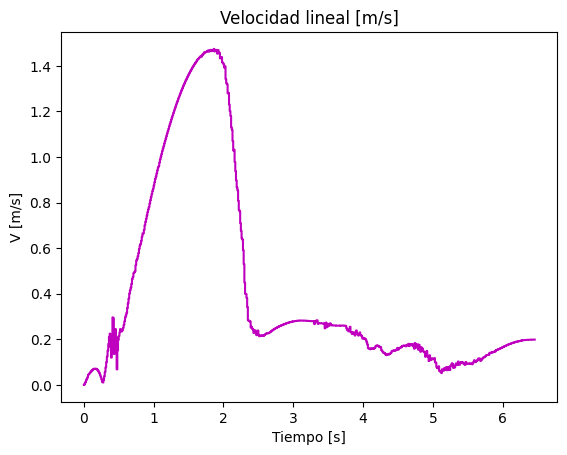

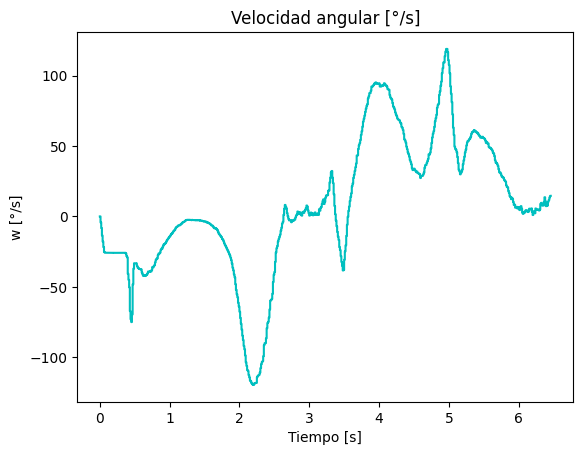

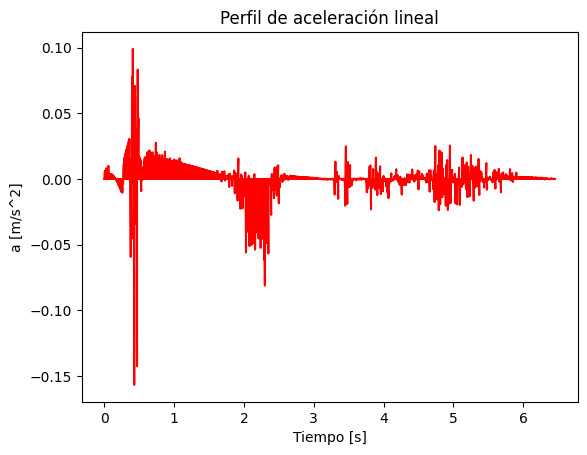

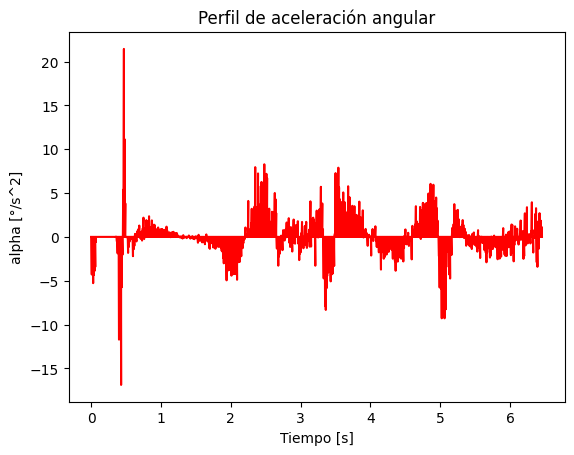

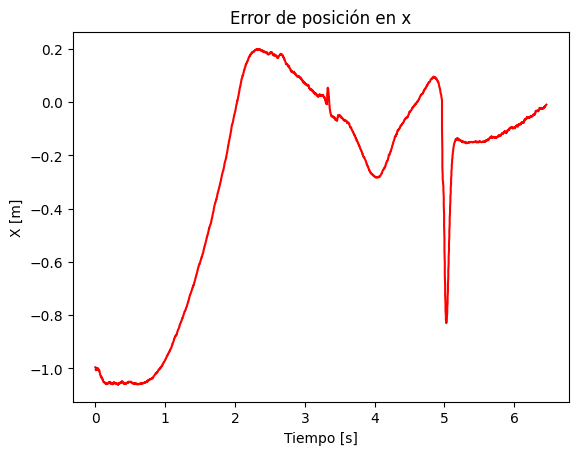

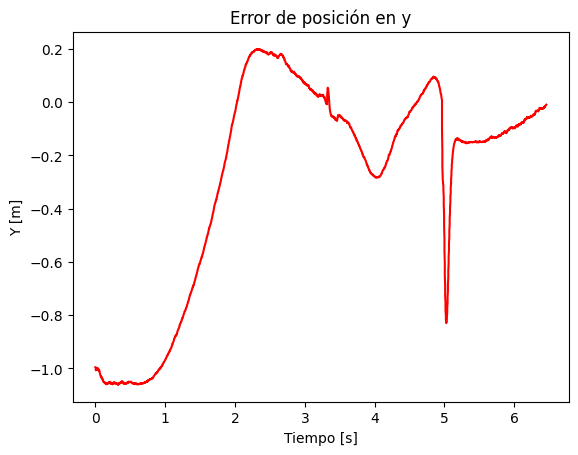

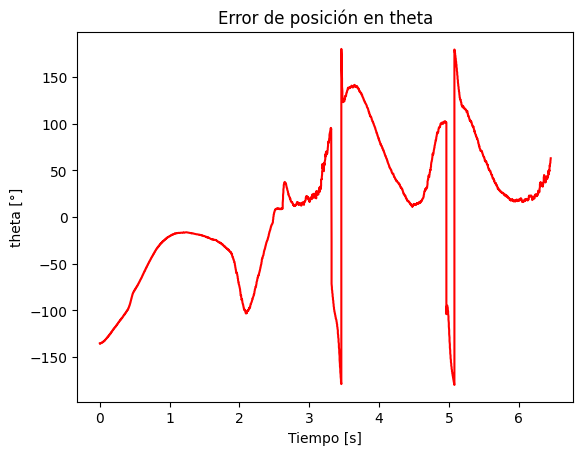

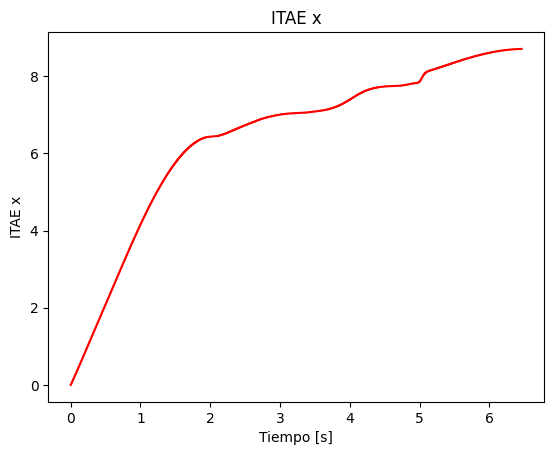

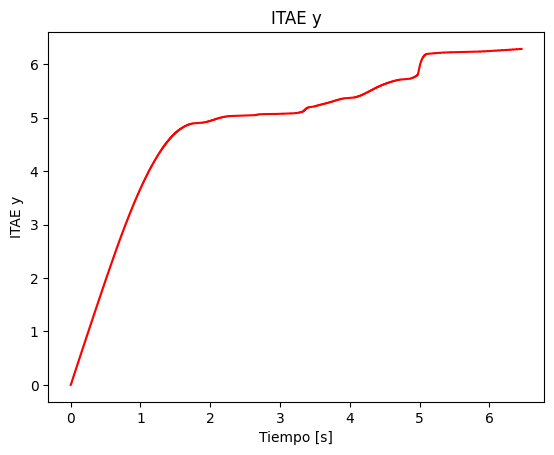

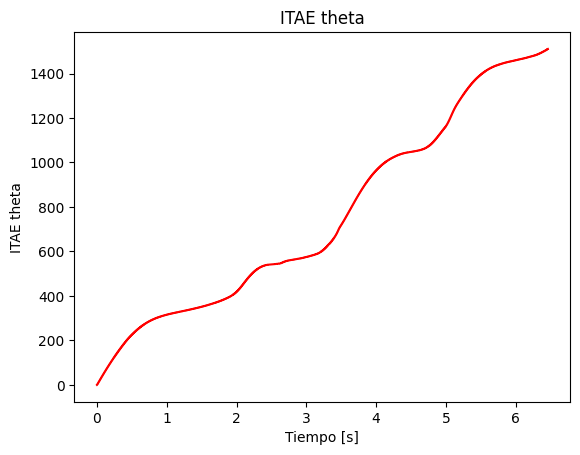

Tiempo de respuesta al 10%: 1.9500000000000015 segundos
Tiempo de establecimiento al 5%: 6.459999999999907 s
ITAE x: 8.708977246712715
ITAE y: 6.2886657147818985
ITAE theta: 26.363631972965607
Función objetivo: 26033610.15804314
Energia acumulada: 52067076.08249966
Errores de regimen permanente: [0.009512378648389386, 0.023856685885459084, 62.90330419048957]


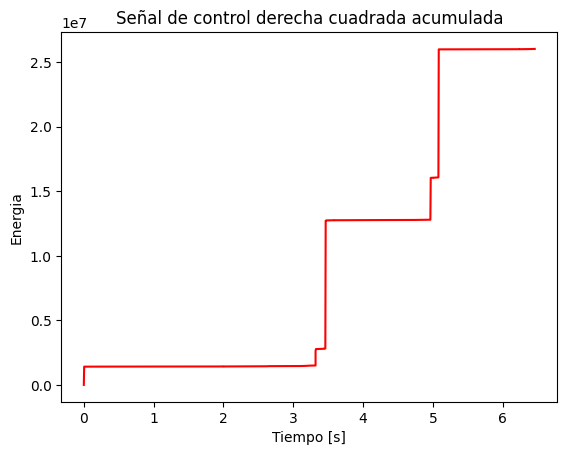

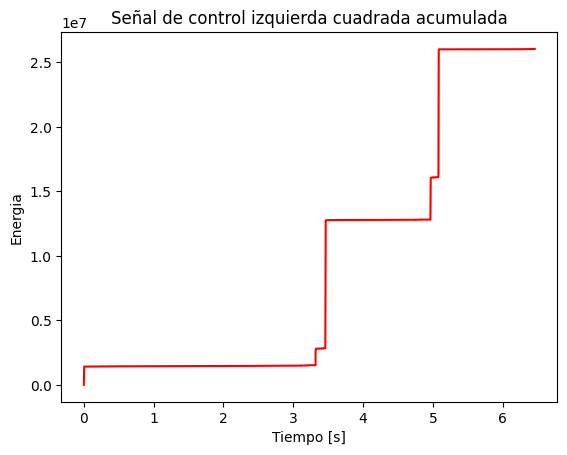

In [14]:
grafico_xy_orientacion(lista_estado_x_pid, lista_estado_y_pid, lista_ref_x_pid, lista_ref_y_pid)
grafico_torques_entrada(lista_tiempo_pid, lista_senal_control_pid)
grafico_estado(lista_tiempo_pid, lista_estado_pid, lista_ref_x_pid, lista_ref_y_pid, lista_ref_a_pid)
grafico_aceleracion(lista_tiempo_pid, lista_estado_pid)
grafico_error(lista_tiempo_pid, lista_err_x_pid, lista_err_x_pid, lista_err_a_pid)
grafico_simple(lista_tiempo_pid, calcular_ITAE_x_pid, 'Tiempo [s]', 'ITAE x', 'ITAE x')
grafico_simple(lista_tiempo_pid, calcular_ITAE_y_pid, 'Tiempo [s]', 'ITAE y', 'ITAE y')
grafico_simple(lista_tiempo_pid, calcular_ITAE_a_pid*180/np.pi, 'Tiempo [s]', 'ITAE theta', 'ITAE theta')
print('Tiempo de respuesta al 10%:', tiempo_respuesta_1setpoint(lista_tiempo_pid, lista_err_x_pid, lista_err_y_pid, lista_err_a_pid, lista_ref_x_pid, lista_ref_y_pid, lista_ref_a_pid, tolerancia=0.1), 'segundos')
print('Tiempo de establecimiento al 5%:', tiempo_establecimiento(lista_tiempo_pid, lista_err_x_pid, lista_err_y_pid, lista_err_a_pid, tolerancia=0.05))
print('ITAE x:', calcular_ITAE_x_pid[-1])
print('ITAE y:', calcular_ITAE_y_pid[-1])
print('ITAE theta:', calcular_ITAE_a_pid[-1])
print('Función objetivo:', lista_jtime_pid[-1])
print('Energia acumulada:', enegergia_acum_d_pid[-1] + enegergia_acum_i_pid[-1])
tiempos_respuesta = tiempo_respuesta(lista_tiempo_pid, lista_err_x_pid, lista_err_y_pid, lista_err_a_pid, lista_ref_x_pid, lista_ref_y_pid, lista_ref_a_pid, tolerancia=0.05)
error_regimen = error_regimen_permanente(lista_tiempo_pid, lista_err_x_pid, lista_err_y_pid, lista_err_a_pid, tiempos_respuesta)
print('Errores de regimen permanente:', [error_regimen[0], error_regimen[1], error_regimen[2]*180/np.pi])
grafico_simple(lista_tiempo_pid, enegergia_acum_d_pid, 'Tiempo [s]', 'Energia', 'Señal de control derecha cuadrada acumulada')
grafico_simple(lista_tiempo_pid, enegergia_acum_i_pid, 'Tiempo [s]', 'Energia', 'Señal de control izquierda cuadrada acumulada')

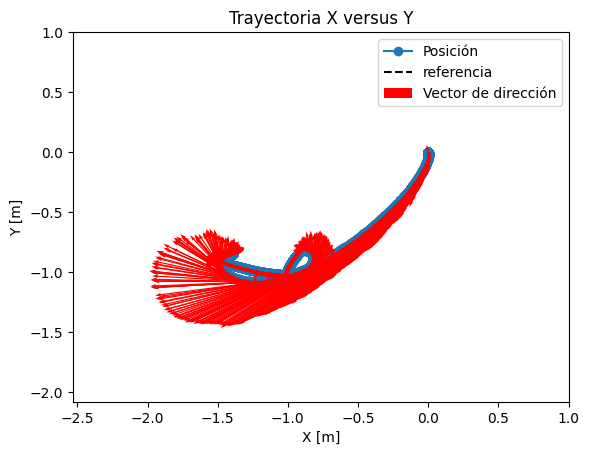

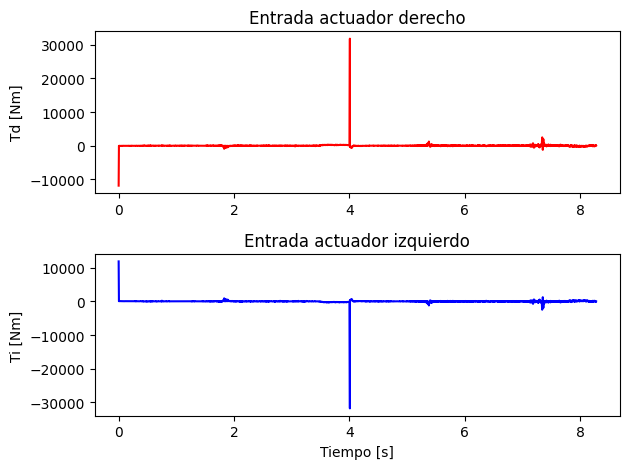

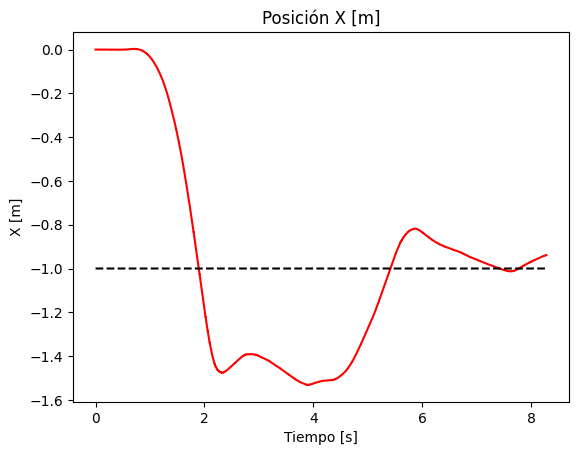

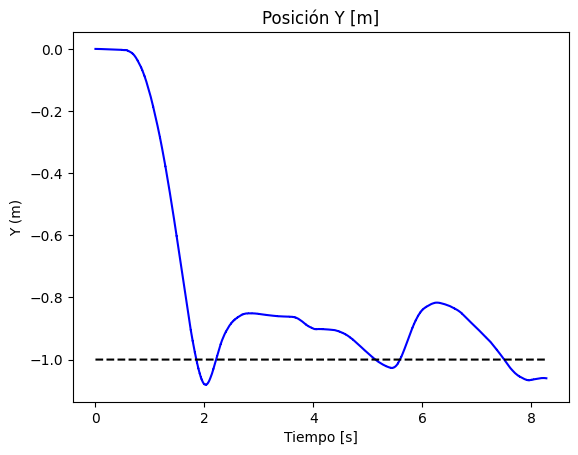

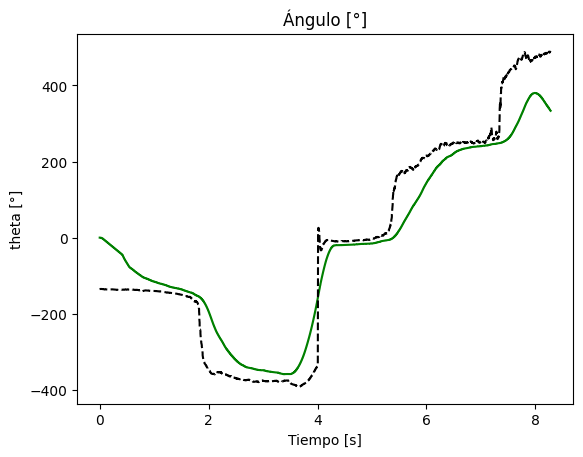

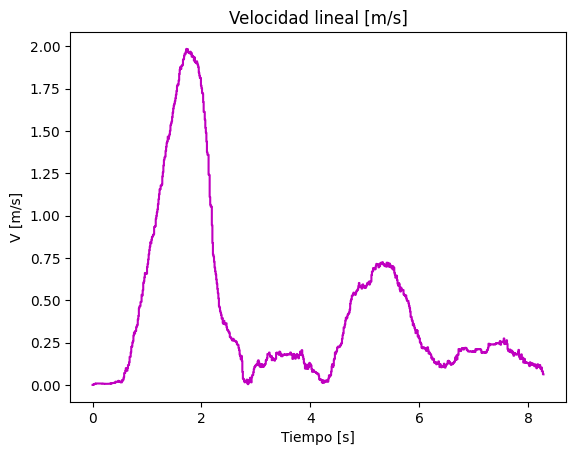

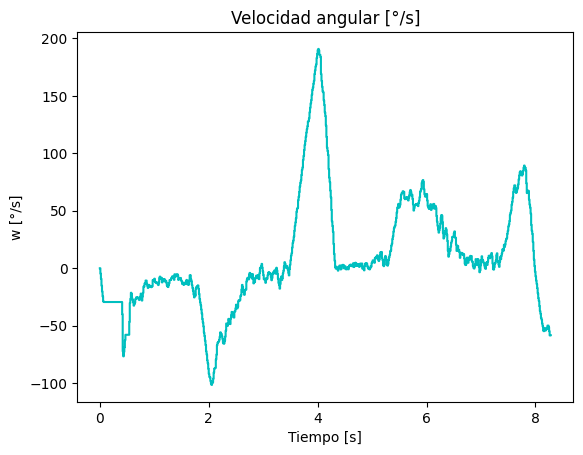

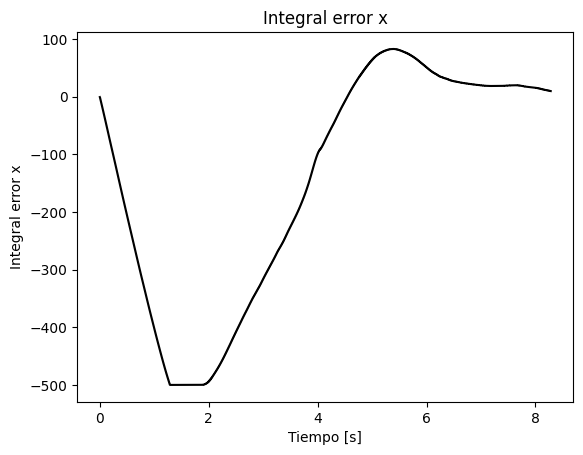

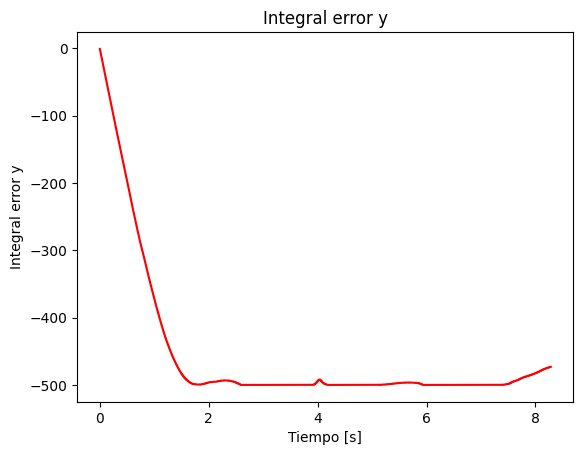

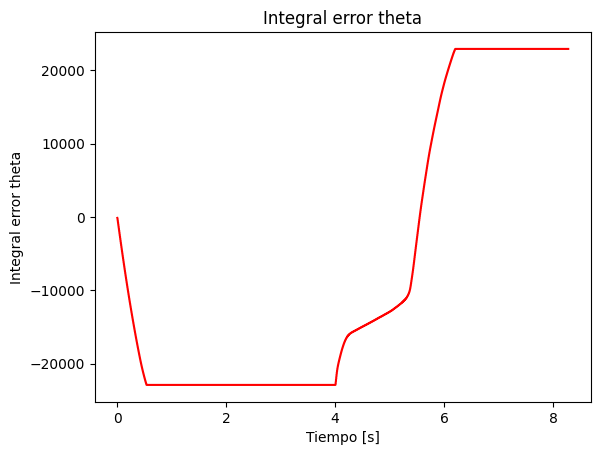

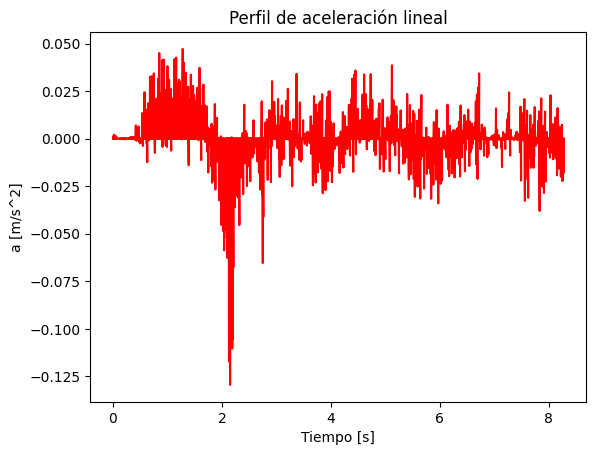

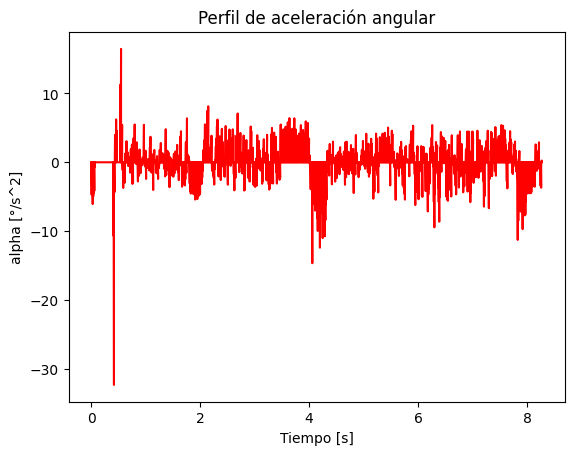

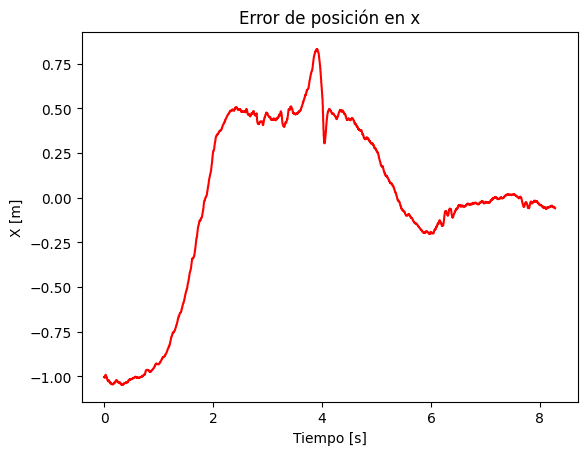

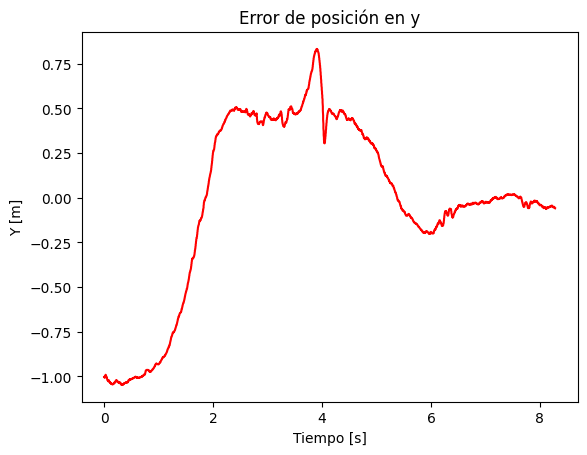

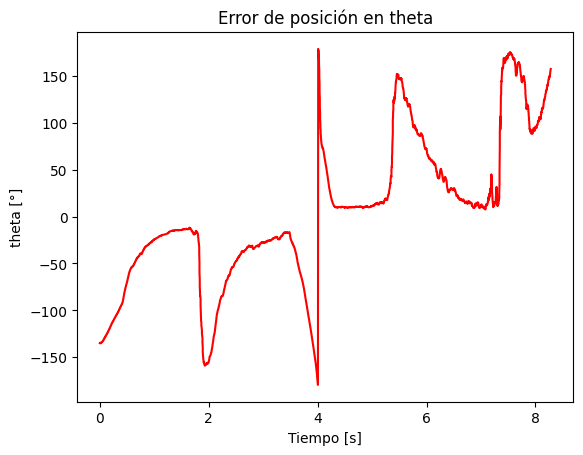

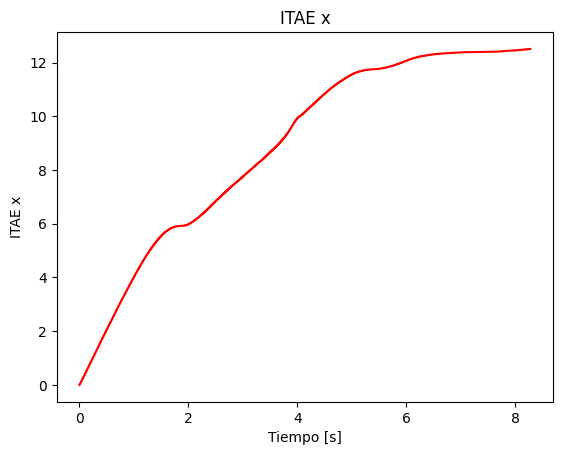

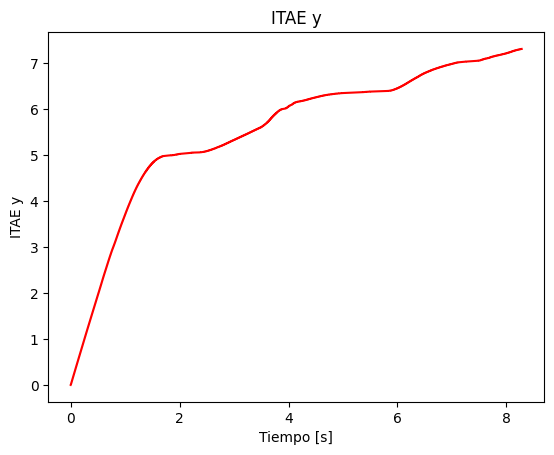

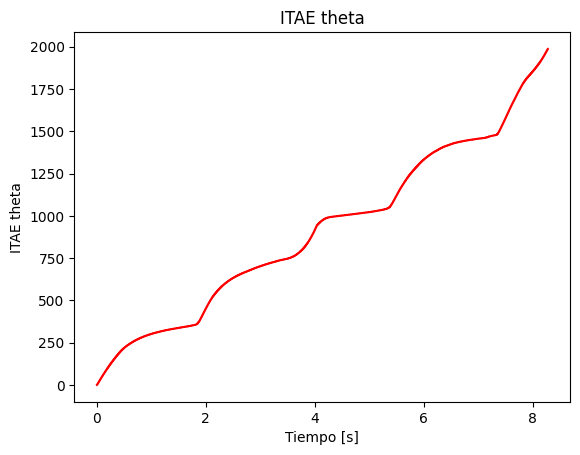

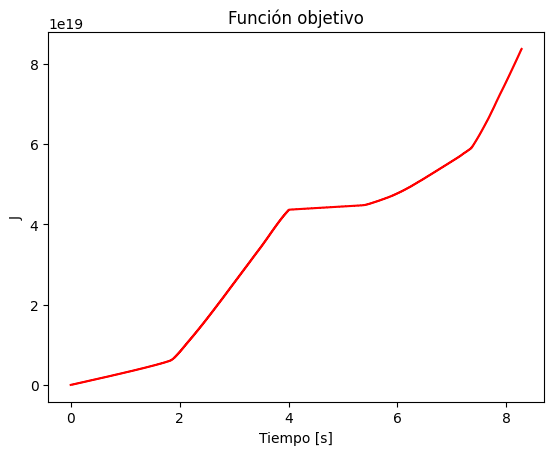

Tiempo de respuesta al 10%: 1.8250000000000013 segundos
Tiempo de establecimiento al 5%: No se establece en tiempo determinado, tiene una respuesta oscilatoria
ITAE x: 12.506471332067076
ITAE y: 7.314435008177214
ITAE theta: 34.68234212864583
Función objetivo: 8.375706364541446e+19
Energia acumulada: 2416052049.186228
Errores de regimen permanente: [0.05938478548645021, 0.06901698422481273, 157.4217348498359]


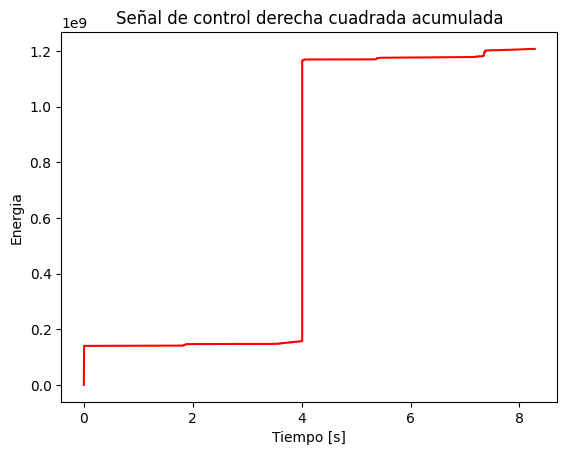

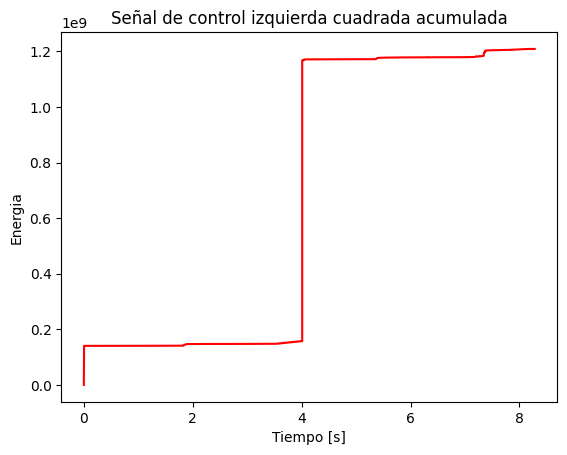

In [15]:
grafico_xy_orientacion(lista_estado_x_lqi, lista_estado_y_lqi, lista_ref_x_lqi, lista_ref_y_lqi)
grafico_torques_entrada(lista_tiempo_lqi, lista_senal_control_lqi)
grafico_estado(lista_tiempo_lqi, lista_estado_lqi, lista_ref_x_lqi, lista_ref_y_lqi, lista_ref_a_lqi)
grafico_aceleracion(lista_tiempo_lqi, lista_estado_lqi)
grafico_error(lista_tiempo_lqi, lista_err_x_lqi, lista_err_x_lqi, lista_err_a_lqi)
grafico_simple(lista_tiempo_lqi, calcular_ITAE_x_lqi, 'Tiempo [s]', 'ITAE x', 'ITAE x')
grafico_simple(lista_tiempo_lqi, calcular_ITAE_y_lqi, 'Tiempo [s]', 'ITAE y', 'ITAE y')
grafico_simple(lista_tiempo_lqi, calcular_ITAE_a_lqi*180/np.pi, 'Tiempo [s]', 'ITAE theta', 'ITAE theta')
grafico_simple(lista_tiempo_lqi, lista_jtime_lqi, 'Tiempo [s]', 'J', 'Función objetivo')
print('Tiempo de respuesta al 10%:', tiempo_respuesta_1setpoint(lista_tiempo_lqi, lista_err_x_lqi, lista_err_y_lqi, lista_err_a_lqi, lista_ref_x_lqi, lista_ref_y_lqi, lista_ref_a_lqi, tolerancia=0.05), 'segundos')
print('Tiempo de establecimiento al 5%:', tiempo_establecimiento(lista_tiempo_lqi, lista_err_x_lqi, lista_err_y_lqi, lista_err_a_lqi, tolerancia=0.05))
print('ITAE x:', calcular_ITAE_x_lqi[-1])
print('ITAE y:', calcular_ITAE_y_lqi[-1])
print('ITAE theta:', calcular_ITAE_a_lqi[-1])
print('Función objetivo:', lista_jtime_lqi[-1])
print('Energia acumulada:', enegergia_acum_d_lqi[-1] + enegergia_acum_i_lqi[-1])
tiempos_respuesta = tiempo_respuesta(lista_tiempo_lqi, lista_err_x_lqi, lista_err_y_lqi, lista_err_a_lqi, lista_ref_x_lqi, lista_ref_y_lqi, lista_ref_a_lqi, tolerancia=0.05)
error_regimen = error_regimen_permanente(lista_tiempo_lqi, lista_err_x_lqi, lista_err_y_lqi, lista_err_a_lqi, tiempos_respuesta)
print('Errores de regimen permanente:', [error_regimen[0], error_regimen[1], error_regimen[2]*180/np.pi])
grafico_simple(lista_tiempo_lqi, enegergia_acum_d_lqi, 'Tiempo [s]', 'Energia', 'Señal de control derecha cuadrada acumulada')
grafico_simple(lista_tiempo_lqi, enegergia_acum_i_lqi, 'Tiempo [s]', 'Energia', 'Señal de control izquierda cuadrada acumulada')

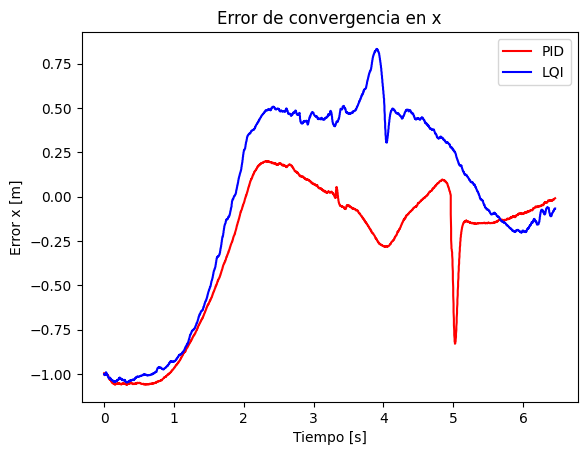

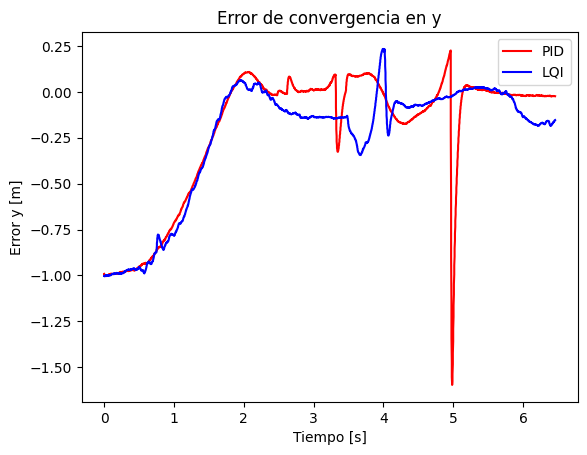

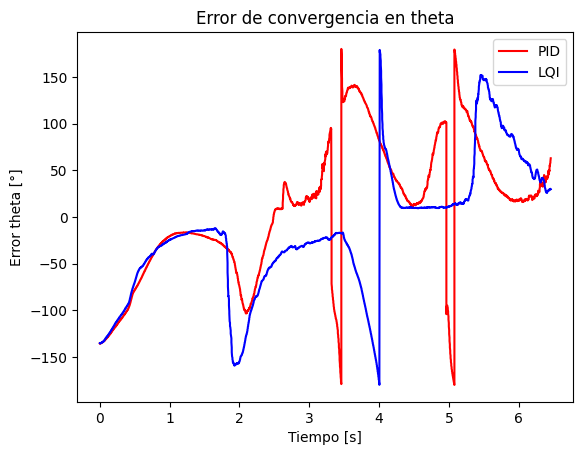

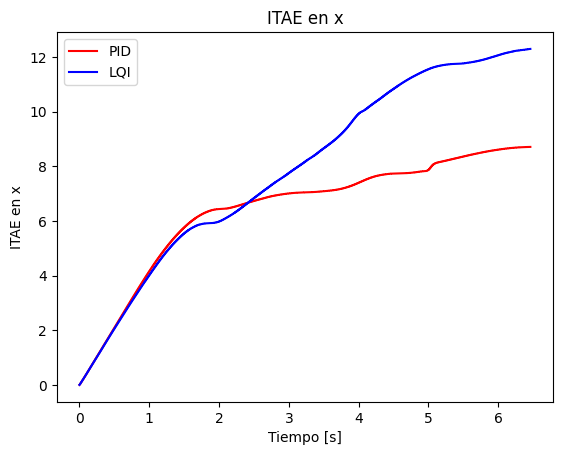

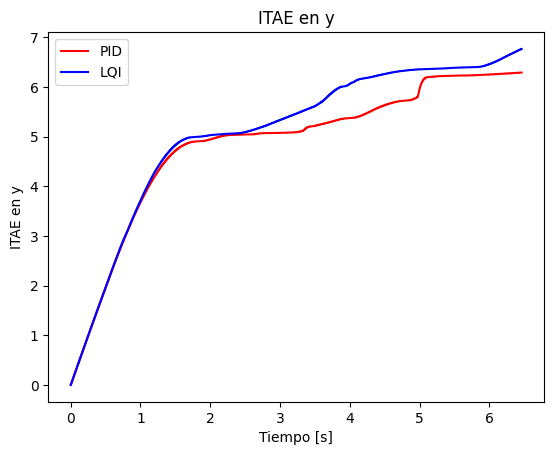

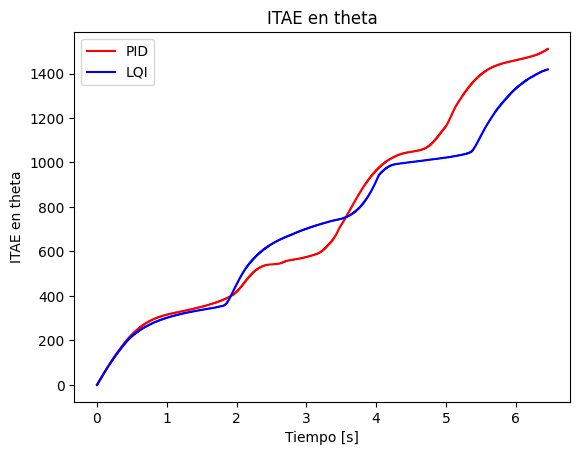

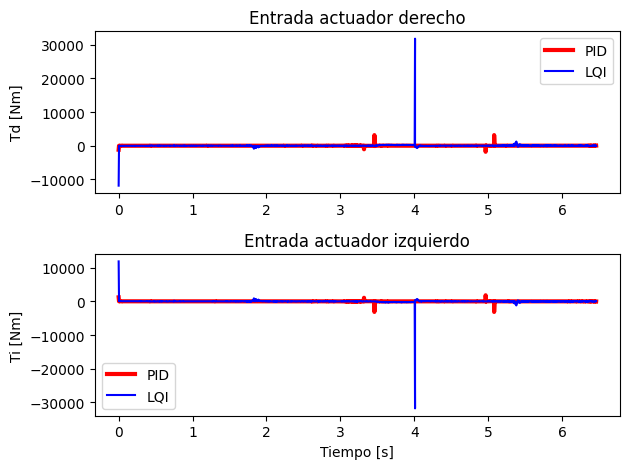

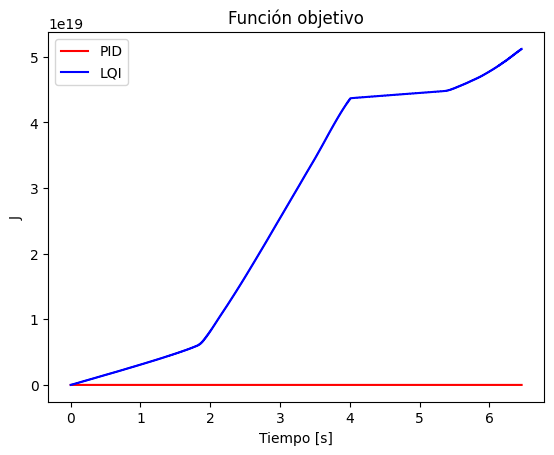

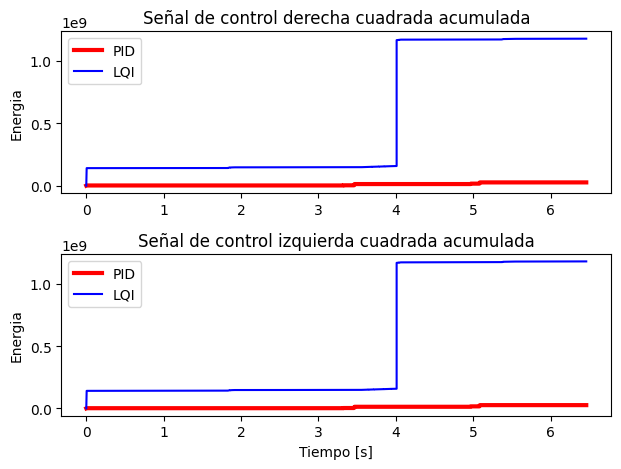

In [16]:
# errores de convergencia x, y, theta
grafico_conjunto(lista_tiempo_pid, lista_err_x_pid, lista_tiempo_lqi, lista_err_x_lqi, 'Tiempo [s]', 'Error x [m]', 'Error de convergencia en x')
grafico_conjunto(lista_tiempo_pid, lista_err_y_pid, lista_tiempo_lqi, lista_err_y_lqi, 'Tiempo [s]', 'Error y [m]', 'Error de convergencia en y')
grafico_conjunto(lista_tiempo_pid, lista_err_a_pid*180/np.pi, lista_tiempo_lqi, lista_err_a_lqi*180/np.pi, 'Tiempo [s]', 'Error theta [°]', 'Error de convergencia en theta')
# ITAE
grafico_conjunto(lista_tiempo_pid, calcular_ITAE_x_pid, lista_tiempo_lqi, calcular_ITAE_x_lqi, 'Tiempo [s]', 'ITAE en x', 'ITAE en x')
grafico_conjunto(lista_tiempo_pid, calcular_ITAE_y_pid, lista_tiempo_lqi, calcular_ITAE_y_lqi, 'Tiempo [s]', 'ITAE en y', 'ITAE en y')
grafico_conjunto(lista_tiempo_pid, calcular_ITAE_a_pid*180/np.pi, lista_tiempo_lqi, calcular_ITAE_a_lqi*180/np.pi, 'Tiempo [s]', 'ITAE en theta', 'ITAE en theta')
# grafico señales de control conjunto
grafico_torques_entrada_conjunto(lista_tiempo_pid, lista_senal_control_pid, lista_tiempo_lqi, lista_senal_control_lqi)
# grafico funcion objetivo conjunto
grafico_conjunto(lista_tiempo_pid, lista_jtime_pid, lista_tiempo_lqi, lista_jtime_lqi, 'Tiempo [s]', 'J', 'Función objetivo')

energia_conjunta_pid = np.transpose(np.array([enegergia_acum_d_pid, enegergia_acum_i_pid]))
energia_conjunta_lqi = np.transpose(np.array([enegergia_acum_d_lqi, enegergia_acum_i_lqi]))
grafico_energia_acumulada_conjunto(lista_tiempo_pid, energia_conjunta_pid, lista_tiempo_lqi, energia_conjunta_lqi)